# 머신러닝 모델 설명

아래는 다양한 머신러닝 모델들의 역할과 특징을 설명한 내용입니다.  
각 모델은 데이터의 패턴을 학습하여 새로운 데이터를 예측하는 데 사용됩니다.

## 1. 선형 모델 (Linear Models)

### **로지스틱 회귀 (Logistic Regression)**
- 분류 문제를 해결하기 위한 통계 모델
- 시그모이드 함수를 이용하여 이진 분류 수행
- 데이터가 선형적으로 분리될 때 효과적

---

## 2. 거리 기반 모델 (Distance-Based Models)

### **K-최근접 이웃 (K-Nearest Neighbors, KNN)**
- 데이터 포인트 간의 거리를 계산하여 가장 가까운 K개의 데이터를 참조해 분류
- 데이터의 분포가 중요하며, 연산량이 많을 수 있음

---

## 3. 트리 기반 모델 (Tree-Based Models)

### **의사결정 트리 (Decision Tree)**
- 데이터를 트리 구조로 나누어 분류하는 모델
- 해석이 쉽고 직관적이지만, 과적합될 가능성이 있음

### **랜덤 포레스트 (Random Forest)**
- 여러 개의 의사결정 트리를 결합하여 예측 성능을 향상시킨 모델
- 과적합을 방지하면서 높은 성능을 발휘

### **엑스트라 트리 (Extra Trees)**
- 랜덤 포레스트와 유사하지만, 분할 기준을 더욱 무작위로 선택하여 학습 속도를 향상

---

## 4. 부스팅 기반 모델 (Boosting Models)

### **그래디언트 부스팅 (Gradient Boosting)**
- 이전 모델이 예측하지 못한 부분을 보완하면서 점진적으로 향상되는 모델
- 정확도가 높지만, 학습 시간이 오래 걸릴 수 있음

### **에이다부스트 (AdaBoost)**
- 여러 개의 약한 학습기(의사결정 트리)를 조합하여 강력한 분류기를 만듦
- 노이즈가 많은 데이터에서는 성능이 떨어질 수 있음

### **XGBoost (eXtreme Gradient Boosting)**
- 그래디언트 부스팅을 개선하여 빠르고 강력한 모델
- 과적합을 방지하는 정규화 기능이 추가됨 

---

## 5. 확률 기반 모델 (Probability-Based Models)

### **나이브 베이즈 (Naive Bayes)**
- 베이즈 정리를 기반으로 한 확률 모델
- 단어 출현 확률을 이용한 스팸 필터링 등에 자주 사용됨
- 독립 가정이 성립할 때 강력한 성능을 보임

---

## 6. 커널 기반 모델 (Kernel-Based Models)

### **서포트 벡터 머신 (Support Vector Machine, SVM)**
- 초평면을 이용해 데이터를 분류하는 모델
- 데이터가 선형적으로 분리되지 않는 경우에도 커널 트릭을 사용해 분류 가능
- 계산량이 많아 대규모 데이터에는 적합하지 않을 수 있음


In [80]:
# !pip install lightgbm

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier 

In [115]:
url = "../(랜덤_포레스트)_모델_학습/make_file/원본_통합_데이터.csv"
file_encoding = "UTF-8"

In [116]:
df = pd.read_csv(url, encoding = file_encoding)

In [117]:
df.columns

Index(['중점_위도', '중점_경도', '경사각', '최근접_시설의_평균거리', '열선여부', '원본여부'], dtype='object')

In [118]:
# 특성과 타겟 변수 분리
X = df[['경사각', '최근접_시설의_평균거리']]
y = df['열선여부']

In [119]:
# 모델 목록
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(eval_metric="logloss", verbosity=1) 
}


In [120]:
# 학습 및 성능 평가
best_model = None
best_score = 0
best_model_name = ""

In [121]:
# 데이터 셔플 및 훈련, 테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle = True)

In [122]:
for model_name, model in models.items():
    model.fit(X_train, y_train)  # 모델 학습
    y_pred = model.predict(X_test)  # 예측
    score = accuracy_score(y_test, y_pred)  # 정확도 계산

    # # 전체 데이터에 대해 각 모델별로 예측값 추가
    # result_variable = "최적모델_예측값"
    # df[result_variable] = best_model.predict(X)


    print(f"{model_name} 정확도: {score:.4f}")
    
    # 성능이 좋은 모델 기록
    if score > best_score:
        best_score = score
        best_model = model
        best_model_name = model_name

Logistic Regression 정확도: 0.9271
SVM 정확도: 0.9177
KNN 정확도: 0.9226
Decision Tree 정확도: 0.9410
Random Forest 정확도: 0.9420
Gradient Boosting 정확도: 0.9340
AdaBoost 정확도: 0.9296
Extra Trees 정확도: 0.9444
Naive Bayes 정확도: 0.9291
XGBoost 정확도: 0.9340


### 원본 데이터를 사용 시 :
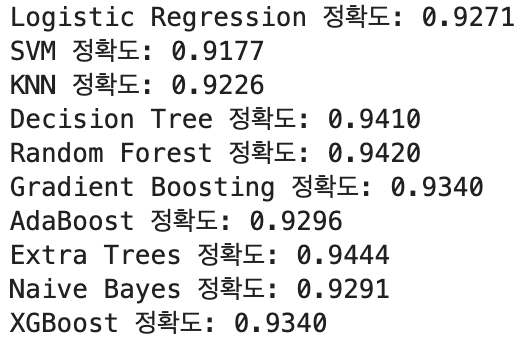



### 증폭 데이터 사용 시 : 
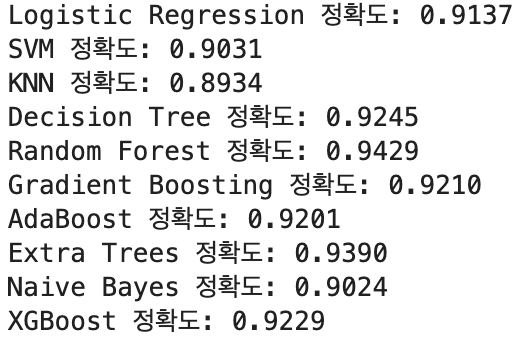

In [130]:
# 최적 모델 출력
print(f"\n최고 성능 모델: {best_model_name} (정확도: {best_score:.4f})")


최고 성능 모델: Extra Trees (정확도: 0.9444)


In [131]:
# 전체 데이터에 대해 최적 모델로 예측값 추가
result_variable = "최적모델_예측값"
df[result_variable] = best_model.predict(X)

In [132]:
print(f"불러온 데이터의 길이 : {len(df)}")

불러온 데이터의 길이 : 6717


In [133]:
filter_df = df[df[result_variable] == 1]
result_df = filter_df[filter_df["열선여부"] == 0]

In [134]:
print(f"새로 예측한 결과물의 길이 : {len(result_df)}")

새로 예측한 결과물의 길이 : 12


In [135]:
if "원본" in url : 
    save_url = "./make_file/원본_데이터로_분석한_결과.csv"
elif "증폭" in url : 
    save_url = "./make_file/증폭_데이터로_분석한_결과.csv"

In [136]:
try :
    result_df.to_csv(save_url, encoding=file_encoding, index = False)
    print(f"{save_url} 파일 저장 완료.")
except OSError as e : 
    print(e)

./make_file/원본_데이터로_분석한_결과.csv 파일 저장 완료.
